# MLP simples: Entrada = Tensão (PwmD, PwmE) -> saida = Velocidade (Wd, We) 


- 1 camada
- 1 neurônio

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

Datasets = []
PREDICTORS = ["PwmD", "PwmE"]   
TARGET = ["Wd", "We"]       

for i in range(3):   
    Dataset = pd.read_csv(f"../Dados/Data{i + 1}.csv")
        
    # Ajusta índice pelo tempo
    Dataset.index = (np.arange(0, len(Dataset), 1).astype(float) * 0.07).round(5)
    
    Datasets.append(Dataset)
    
    print(f"++++++++++++++++++++ Dataset {i+1} +++++++++++++++++++++++")
    print(Dataset.head(5))


++++++++++++++++++++ Dataset 1 +++++++++++++++++++++++
        X    Y  Theta   Wd   We  WdRef  WeRef   PwmD   PwmE
0.00  0.0  0.7    0.0  0.0  0.0  -0.00   0.00  -0.00   0.00
0.07  0.0  0.7    0.0  0.0  0.0   2.96   2.96  -0.00   0.00
0.14  0.0  0.7    0.0  0.0  0.0   2.96   2.96  44.36  44.36
0.21  0.0  0.7    0.0  0.0  0.0   2.96   2.96  44.36  44.36
0.28  0.0  0.7    0.0  0.0  0.0   2.96   2.96  62.10  62.10
++++++++++++++++++++ Dataset 2 +++++++++++++++++++++++
        X    Y  Theta    Wd   We  WdRef  WeRef   PwmD   PwmE
0.00  0.0  0.7    0.0  0.00  0.0  -0.00   0.00  -0.00   0.00
0.07  0.0  0.7    0.0  0.00  0.0   3.02   3.02  -0.00   0.00
0.14  0.0  0.7    0.0  0.00  0.0   3.02   3.02  45.32  45.32
0.21  0.0  0.7    0.0  0.03  0.0   3.02   3.02  45.32  45.32
0.28  0.0  0.7    0.0  0.00  0.0   3.02   3.02  63.00  63.44
++++++++++++++++++++ Dataset 3 +++++++++++++++++++++++
        X    Y  Theta    Wd    We  WdRef  WeRef   PwmD   PwmE
0.00  0.0  0.7    0.0  0.00  0.00  -0.00   0.00

In [29]:
NormDatasets = []

SCALER = StandardScaler()
OUT_SCALER = StandardScaler()

TrainDataset = Datasets[0]
TrainDataset[PREDICTORS] = SCALER.fit_transform(TrainDataset[PREDICTORS])
TrainDataset[TARGET] = OUT_SCALER.fit_transform(TrainDataset[TARGET])
NormDatasets.append(TrainDataset)

for i in range(2):
      CurrentTestDataset = Datasets[i + 1]
      CurrentTestDataset[PREDICTORS] = SCALER.transform(CurrentTestDataset[PREDICTORS])
      CurrentTestDataset[TARGET] = OUT_SCALER.transform(CurrentTestDataset[TARGET])
      NormDatasets.append(CurrentTestDataset)
      print(f"++++++++++++++++++++ Dataset Normalizado {i+1} +++++++++++++++++++++++")
      print(NormDatasets[i].head(5))

++++++++++++++++++++ Dataset Normalizado 1 +++++++++++++++++++++++
        X    Y  Theta        Wd        We  WdRef  WeRef      PwmD      PwmE
0.00  0.0  0.7    0.0  0.106146  0.084794  -0.00   0.00  0.157367  0.128252
0.07  0.0  0.7    0.0  0.106146  0.084794   2.96   2.96  0.157367  0.128252
0.14  0.0  0.7    0.0  0.106146  0.084794   2.96   2.96  0.696666  0.601998
0.21  0.0  0.7    0.0  0.106146  0.084794   2.96   2.96  0.696666  0.601998
0.28  0.0  0.7    0.0  0.106146  0.084794   2.96   2.96  0.912337  0.791454
++++++++++++++++++++ Dataset Normalizado 2 +++++++++++++++++++++++
        X    Y  Theta        Wd        We  WdRef  WeRef      PwmD      PwmE
0.00  0.0  0.7    0.0  0.106146  0.084794  -0.00   0.00  0.157367  0.128252
0.07  0.0  0.7    0.0  0.106146  0.084794   3.02   3.02  0.157367  0.128252
0.14  0.0  0.7    0.0  0.106146  0.084794   3.02   3.02  0.708337  0.612251
0.21  0.0  0.7    0.0  0.117743  0.084794   3.02   3.02  0.708337  0.612251
0.28  0.0  0.7    0.0  0.10614

In [30]:
x_train = np.array(TrainDataset[PREDICTORS])
y_train = np.array(TrainDataset[TARGET])

x_val = np.array((NormDatasets[1])[PREDICTORS])
y_val = np.array((NormDatasets[1])[TARGET])

print(f"Dimensão da entrada: {np.shape(x_train)}")
print(f"Dimensão da saida: {np.shape(y_train)}")

Dimensão da entrada: (806, 2)
Dimensão da saida: (806, 2)


In [31]:
import matplotlib.pyplot as plt

def PlotHistory(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss')
    plt.title('Training History')
    plt.legend()
    plt.grid(True)
    plt.show()
    


In [32]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

TITLES = ["Training", "Validation", "Test 1"]

def PlotOut(ax, title, target_name, y_true, y_pred):
    time = (np.arange(0, len(y_pred), 1).astype(float) * 0.07).round(5)

    ax.scatter(time, y_true, marker='o', s=12, label='Amostras Reais', alpha=0.7)
    ax.scatter(time, y_pred, marker='x', s=12, label='Valores Preditos', alpha=0.7)
    ax.set_title(f'{title} - {target_name}')
    ax.set_xlabel('Tempo [s]')
    ax.set_ylabel(target_name)
    ax.legend()
    ax.grid(True)


def EvalModel(model):
    n_datasets = len(Datasets)
    n_targets = len(TARGET)
    fig, axs = plt.subplots(n_datasets, n_targets, figsize=(6 * n_targets, 4 * n_datasets))
    
    metrics = {name: {"R2": [], "MSE": []} for name in TARGET}

    for i, dataset in enumerate(NormDatasets):
        x = np.array(dataset[PREDICTORS])
        
        # Desnormaliza saídas
        y_true = OUT_SCALER.inverse_transform(dataset[TARGET])
        y_pred = OUT_SCALER.inverse_transform(model.predict(x))

        # Calcula métricas por saída
        for j, name in enumerate(TARGET):
            r2 = r2_score(y_true[:, j], y_pred[:, j])
            mse = mean_squared_error(y_true[:, j], y_pred[:, j])
            metrics[name]["R2"].append(r2)
            metrics[name]["MSE"].append(mse)

            print(f"{name} | {TITLES[i]} -> R² = {r2:.4f}, MSE = {mse:.4e}")
            
            # Seleciona o eixo correto (funciona mesmo com 1x1, 1x2 ou 3x2)
            ax = axs[i][j] if n_datasets > 1 and n_targets > 1 else (
                axs[j] if n_targets > 1 else axs[i] if n_datasets > 1 else axs
            )
            PlotOut(ax, TITLES[i], name, y_true[:, j], y_pred[:, j])

    plt.tight_layout()
    plt.show()

    # Retorna métricas médias para análise posterior
    return metrics

In [33]:
from tensorflow import keras
from keras.callbacks import EarlyStopping

INPUT_SIZE = len(PREDICTORS)  
OUTPUT_SIZE = len(TARGET)  

model = keras.models.Sequential([
    keras.layers.Input(shape=(INPUT_SIZE,)),
    keras.layers.Dense(OUTPUT_SIZE, activation="linear"),  
])
model.summary()
print(f"Pesos inciais:\n {model.get_weights()}")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Pesos inciais:
 [array([[ 0.8103589 , -0.95297873],
       [-0.7225346 , -0.02686977]], dtype=float32), array([0., 0.], dtype=float32)]


Configures the model for training.

In [34]:
model.compile(loss="mean_squared_error", optimizer="adam")

Trains the model for a fixed number of epochs (dataset iterations).

In [35]:
early_stopping_monitor = EarlyStopping(monitor='val_loss',
                                patience=50,
                                restore_best_weights=True)

history = model.fit(x_train, 
                    y_train, 
                    epochs=1000,
                    callbacks=[early_stopping_monitor],
 validation_data=(x_val, y_val))

Epoch 1/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.3203 - val_loss: 2.2715
Epoch 2/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1036 - val_loss: 2.1347
Epoch 3/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0322 - val_loss: 2.0036
Epoch 4/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9005 - val_loss: 1.8823
Epoch 5/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7410 - val_loss: 1.7661
Epoch 6/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6837 - val_loss: 1.6558
Epoch 7/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5682 - val_loss: 1.5523
Epoch 8/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4707 - val_loss: 1.4544
Epoch 9/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3628 - val_loss: 1.3643
Epoch 10/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3183 - val_loss: 1.2778
Epoch 11/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2352 - val_loss: 1.1981
Epoch 12/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

In [36]:
print(f"Pesos finais:\n {model.get_weights()}")

Pesos finais:
 [array([[0.8943837 , 0.4866123 ],
       [0.0725766 , 0.48621637]], dtype=float32), array([-0.00546697, -0.00591722], dtype=float32)]


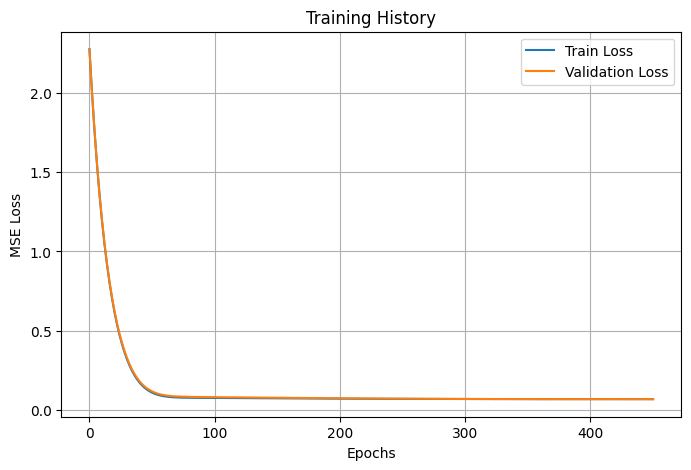

In [37]:
PlotHistory(history)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Wd | Training -> R² = 0.9275, MSE = 4.8514e-01
We | Training -> R² = 0.9335, MSE = 4.4156e-01
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Wd | Validation -> R² = 0.9432, MSE = 3.8802e-01
We | Validation -> R² = 0.9238, MSE = 5.3148e-01
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Wd | Test 1 -> R² = 0.8885, MSE = 6.8607e-01
We | Test 1 -> R² = 0.8475, MSE = 9.6105e-01


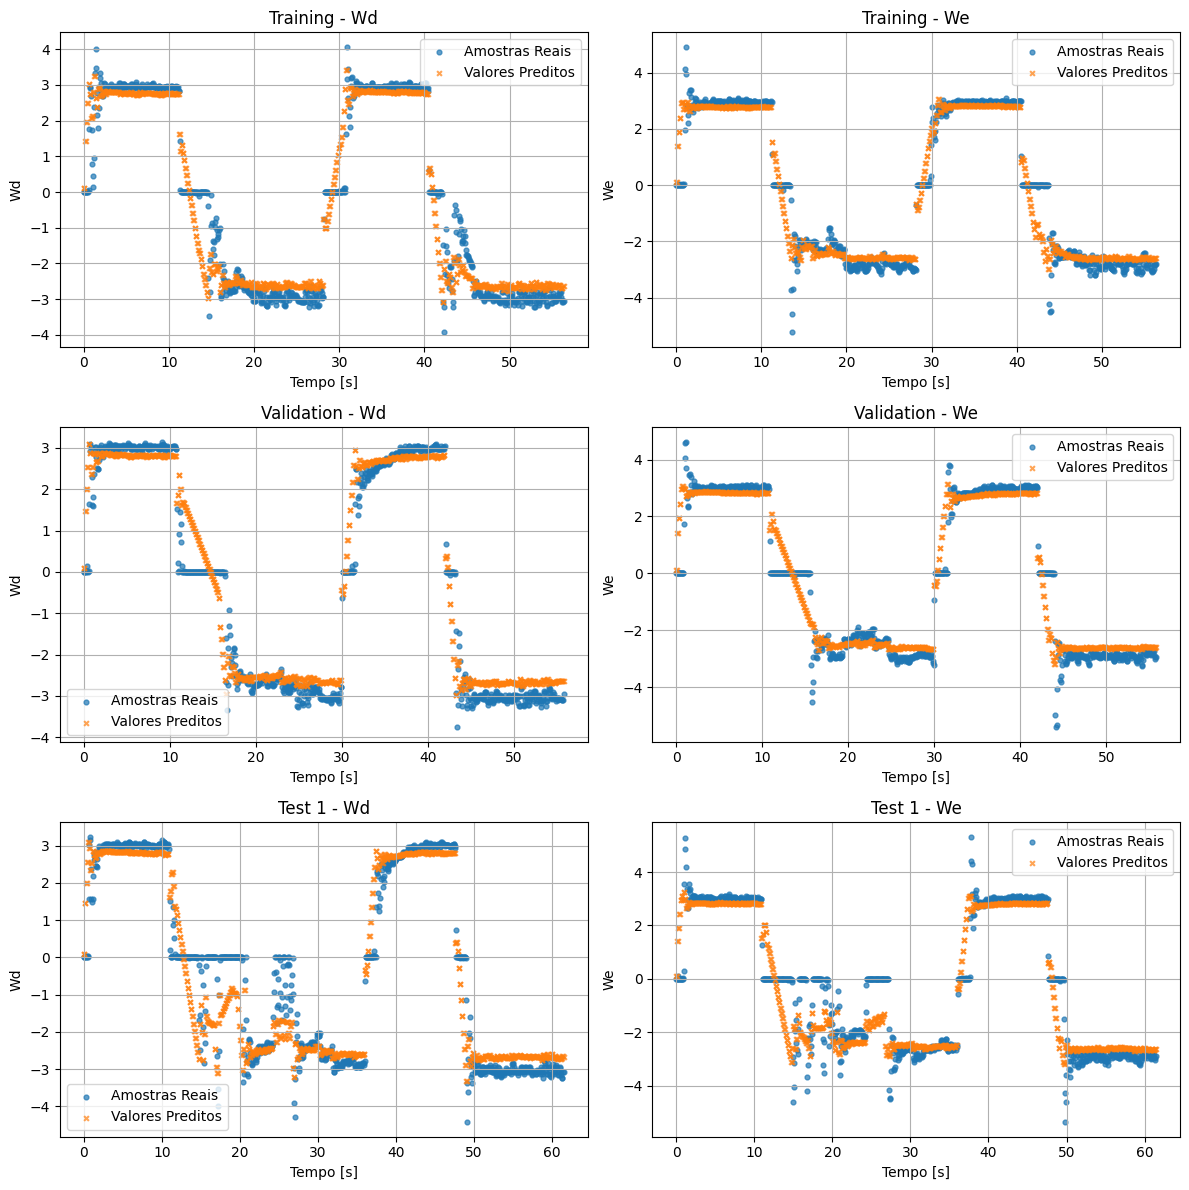

{'Wd': {'R2': [0.9274999309710961, 0.943245177244364, 0.8884994101258634],
  'MSE': [0.48513504004260877, 0.3880223417563437, 0.6860699234550732]},
 'We': {'R2': [0.9334688761865941, 0.9237869136924514, 0.8475117206347554],
  'MSE': [0.4415621954202341, 0.5314762439897613, 0.9610533289223329]}}

In [38]:
EvalModel(model)